### Part 1
#### Classification: 

#### Gini Index

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

df = pd.read_csv("Dataset/Processed_dataset.csv", encoding="windows-1252")

df = df.drop(columns=['Hour'])

# Separate features and target
X = df.drop(columns=df.columns[9])  
y = df.iloc[:, 9]                   

print(X.head())
print(y.head())

   Year  Month  Day  Weekend?  Collision Type  Injury Type  Primary Factor  \
0  2015      1    5         0               1            2              27   
1  2015      1    6         0               1            2              11   
2  2015      1    6         1               1            3               5   
3  2015      1    7         1               1            3              10   
4  2015      1    7         1               1            2              10   

   Reported_Location  Latitude     Risk Level  Hour_Bin  
0               1301  0.949805  Moderate Risk         3  
1               1612  0.949860  Moderate Risk         0  
2               4438  0.949577       Low Risk         1  
3              10505  0.949962      High Risk         2  
4              18788  0.949942  Moderate Risk         2  
0    0.013861
1    0.013810
2    0.013616
3    0.013576
4    0.013555
Name: Longitude, dtype: float64


In [6]:
#splitting 30-70

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

# Gini
clf_gini_70 = DecisionTreeClassifier(random_state=42)
#train
clf_gini_70 = clf_gini_70.fit(X_train_70 ,  y_train_70 )
#predict
y_pred_gini_70 = clf_gini_70.predict(X_test_30)

print("Gini Index Results:")
print("Accuracy:", accuracy_score(y_test_30, y_pred_gini_70))
print("Classification Report:\n", classification_report(y_test_30, y_pred_gini_70))
print("Confusion Matrix:\n", confusion_matrix(y_test_30, y_pred_gini_70))

ValueError: could not convert string to float: 'Low Risk'

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


print("Training set size:", X_train_70.shape[0])
print("Testing set size:", X_test_30.shape[0])
print("Original dataset size:", df.shape[0])

print("Confusion Matrix:\n", confusion_matrix(y_test_30, y_pred_gini_70))

cn = ["Low Risk", "Moderate Risk", "High Risk"]

disp = ConfusionMatrixDisplay.from_estimator(clf_gini_70, X_test_30, y_test_30, display_labels=cn )

In [ ]:
# Splitting the dataset 80-20
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

# Gini Index
clf_gini_80 = DecisionTreeClassifier(random_state=42)  # Gini is the default criterion
# Train the classifier
clf_gini_80 = clf_gini_80.fit(X_train_80, y_train_80)
# Predict on the 20% test set
y_pred_gini_80 = clf_gini_80.predict(X_test_20)

# Display results
print("Gini Index Results (80-20 split):")
print("Accuracy:", accuracy_score(y_test_20, y_pred_gini_80))
print("Classification Report:\n", classification_report(y_test_20, y_pred_gini_80))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_gini_80))

In [ ]:
print("Training set size:", X_train_80.shape[0])
print("Testing set size:", X_test_20.shape[0])
print("Original dataset size:", df.shape[0])

print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_gini_80))



disp = ConfusionMatrixDisplay.from_estimator(clf_gini_80, X_test_20, y_test_20, display_labels=cn )

In [ ]:
# Splitting data into 90% train and 10% test
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the Decision Tree classifier with Gini index
clf_gini_90 = DecisionTreeClassifier(random_state=42)
# Train the model
clf_gini_90.fit(X_train_90, y_train_90)
# Predict on the test set
y_pred_gini_90 = clf_gini_90.predict(X_test_10)

# Display results
print("Gini Index Results (90-10 split):")
print("Accuracy:", accuracy_score(y_test_10, y_pred_gini_90))
print("Classification Report:\n", classification_report(y_test_10, y_pred_gini_90))

In [ ]:
print("Training set size:", X_train_90.shape[0])
print("Testing set size:", X_test_10.shape[0])
print("Original dataset size:", df.shape[0])

print("Confusion Matrix:\n", confusion_matrix(y_test_10, y_pred_gini_80))



disp = ConfusionMatrixDisplay.from_estimator(clf_gini_90, X_test_10, y_test_10, display_labels=cn )

### Entropy:

#### 50/50 split

Accuracy: 0.8944090167581196
[[11656     0    68]
 [  508  2576   201]
 [ 2071     0  9892]]
predictions for test data: 
 ['High Risk' 'High Risk' 'High Risk' ... 'Moderate Risk' 'High Risk'
 'Moderate Risk']


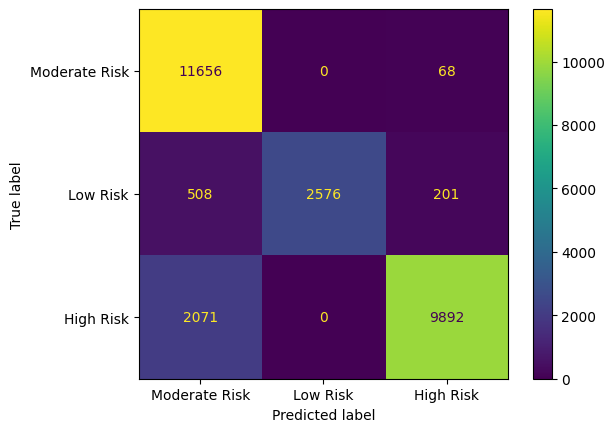

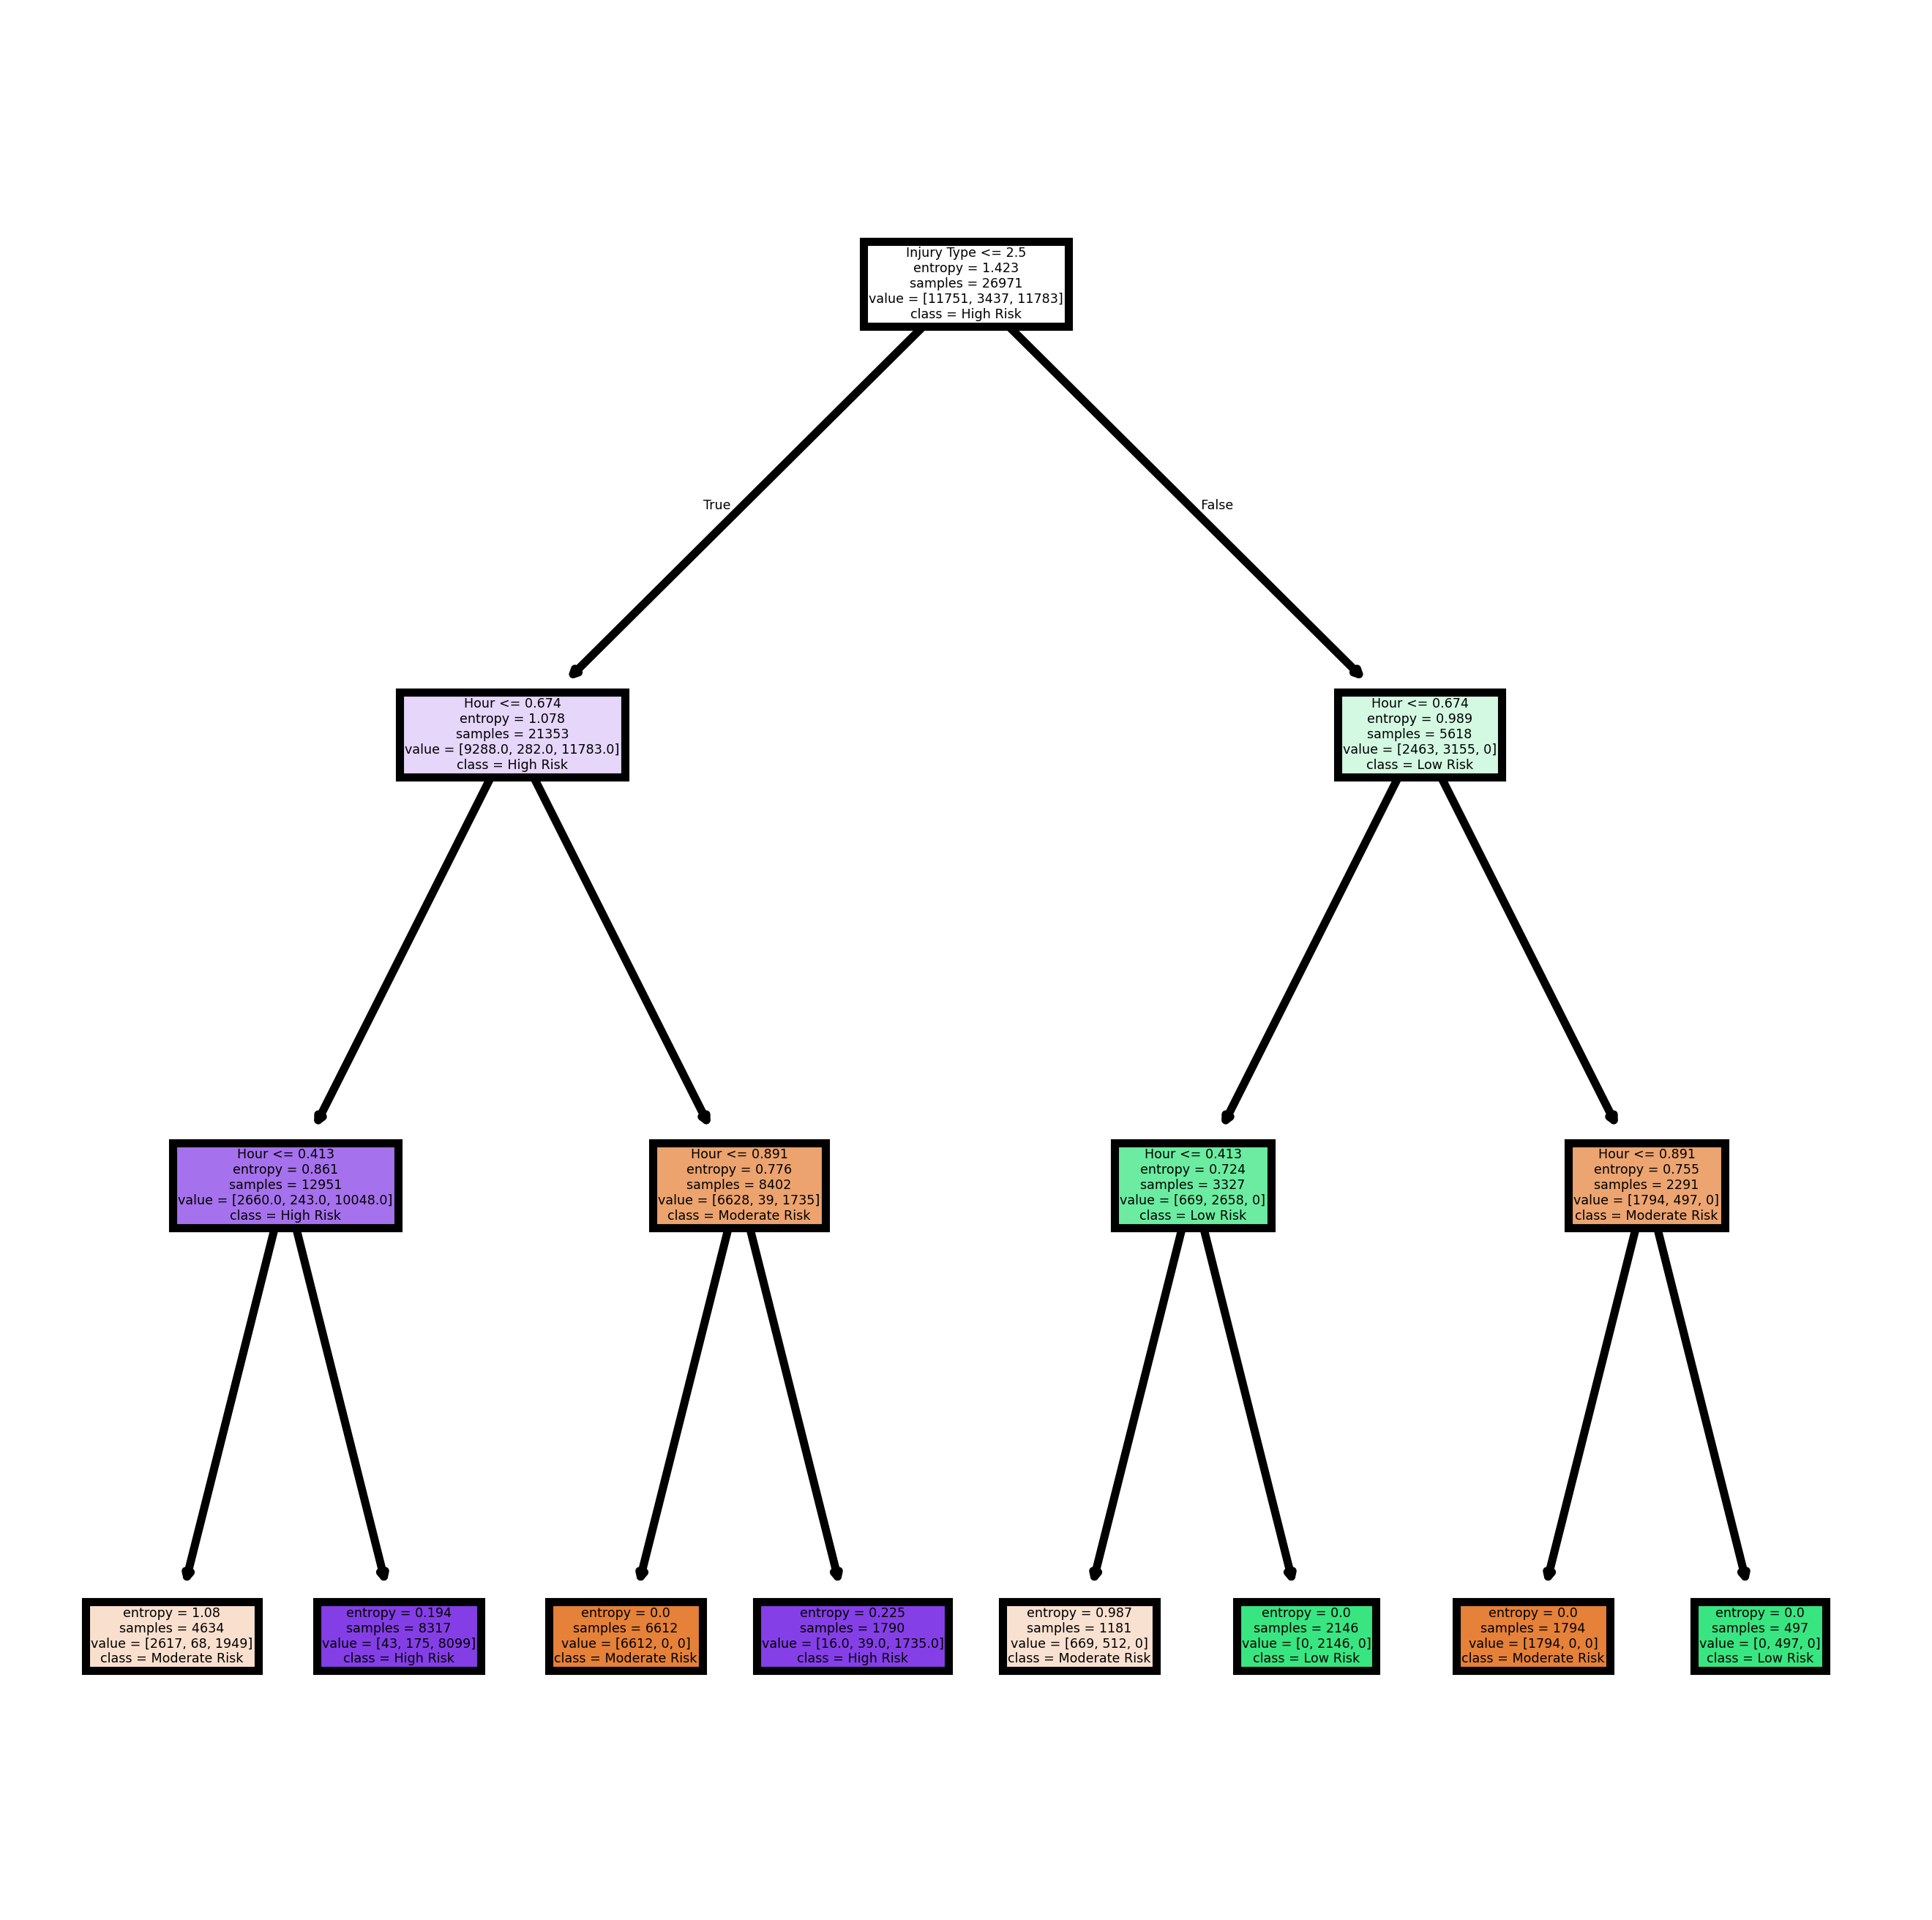

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree


#load data
df = pd.read_csv("Dataset/Processed_dataset.csv")

#split dataset in features and target variable
fn = ['Year', 'Month', 'Day', 'Weekend?','Hour', 'Collision Type', 'Injury Type', 'Primary Factor', 'Latitude', 'Longitude', 'Hour_Bin'] #df column names without column risk level
X = df[fn] # feature names
y = df['Risk Level'] # Target variable

#split dataset into training set and test set
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.5,random_state=1) # %50 test %50 training

#Create Decision Tree classifier Object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Train Decision Tree classifier
clf = clf.fit(X_train,y_train)

#predict the response for test Data
y_pred = clf.predict(X_test)

# Model Accuracy, How often is the classfier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

# Compute and print the confusion matirx 
cm = confusion_matrix(y_test,y_pred)
print(cm)

# classes_names
cn = df['Risk Level'].unique()

#create confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)

# setting dpi =800 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, figsize=(4,4), dpi=800)

tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True);

import pickle
# save your model to a file
filename = 'decision_tree_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# load  model from a file
loaded_model = pickle.load(open(filename,'rb'))

# Make predictions with the model on test data
predictions = loaded_model.predict(X_test)
print("predictions for test data: \n",predictions)


#### 80/20 split

Accuracy: 0.894681960375391
[[18753     0   106]
 [  870  4159   331]
 [ 3238     0 15698]]
predictions for test data: 
 ['High Risk' 'High Risk' 'High Risk' ... 'High Risk' 'Low Risk' 'Low Risk']


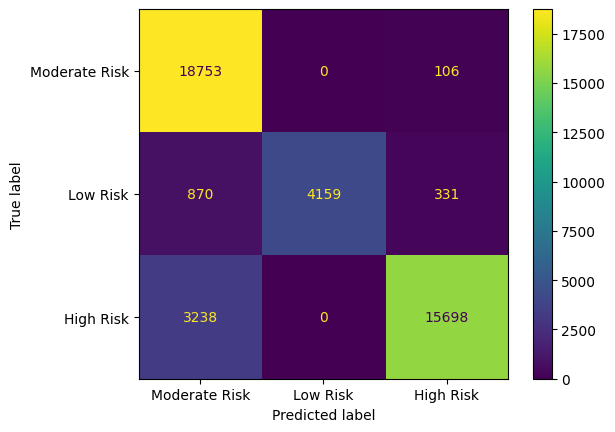

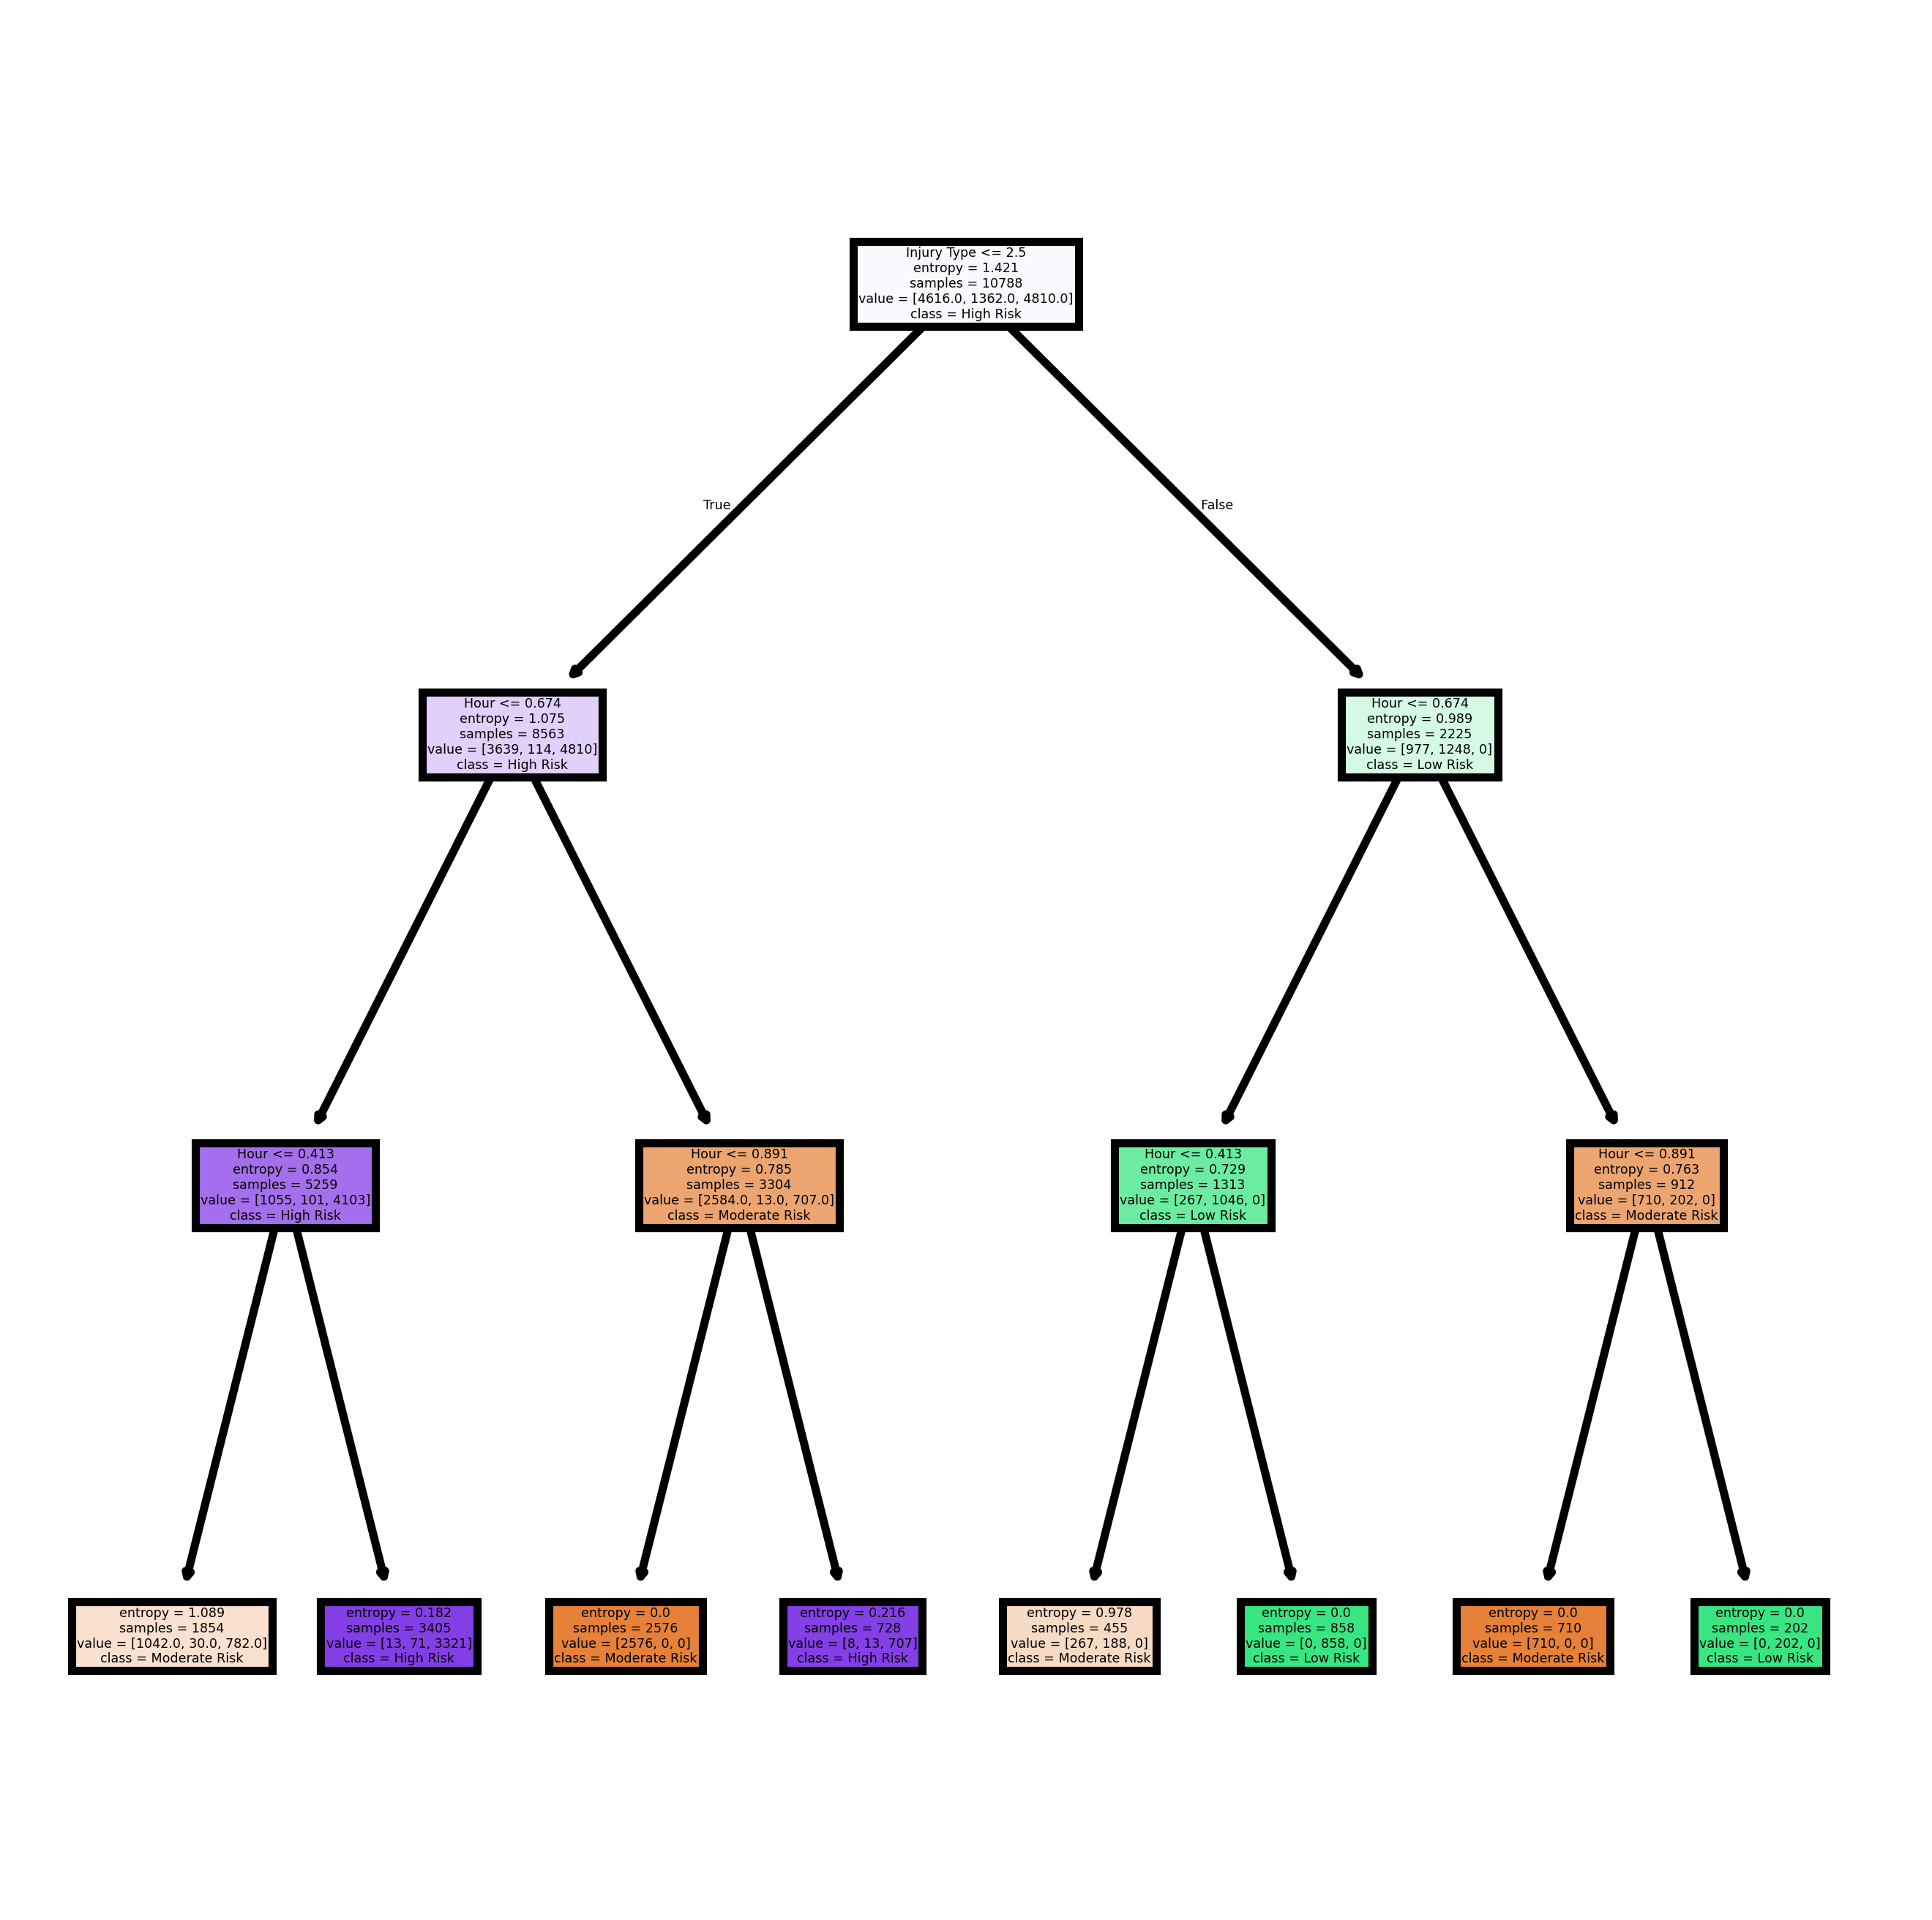

In [3]:
#split dataset into training set and test set
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.8,random_state=1) # %80 test %20 training

#Create Decision Tree classifier Object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Train Decision Tree classifier
clf = clf.fit(X_train,y_train)

#predict the response for test Data
y_pred = clf.predict(X_test)

# Model Accuracy, How often is the classfier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

# Compute and print the confusion matirx 
cm = confusion_matrix(y_test,y_pred)
print(cm)

# classes_names
cn = df['Risk Level'].unique()

#create confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)

# setting dpi =800 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, figsize=(4,4), dpi=800)

tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True);

import pickle
# save your model to a file
filename = 'decision_tree_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# load  model from a file
loaded_model = pickle.load(open(filename,'rb'))

# Make predictions with the model on test data
predictions = loaded_model.predict(X_test)
print("predictions for test data: \n",predictions)

#### 70/30 split

Accuracy: 0.8944943195360292
[[16358     0    96]
 [  743  3616   292]
 [ 2853     0 13803]]
predictions for test data: 
 ['High Risk' 'High Risk' 'High Risk' ... 'High Risk' 'Moderate Risk'
 'Moderate Risk']


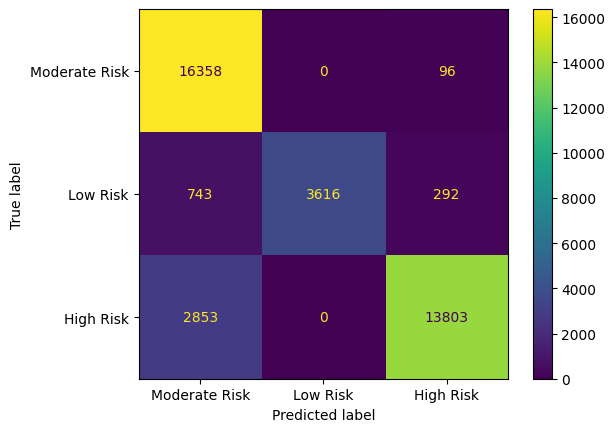

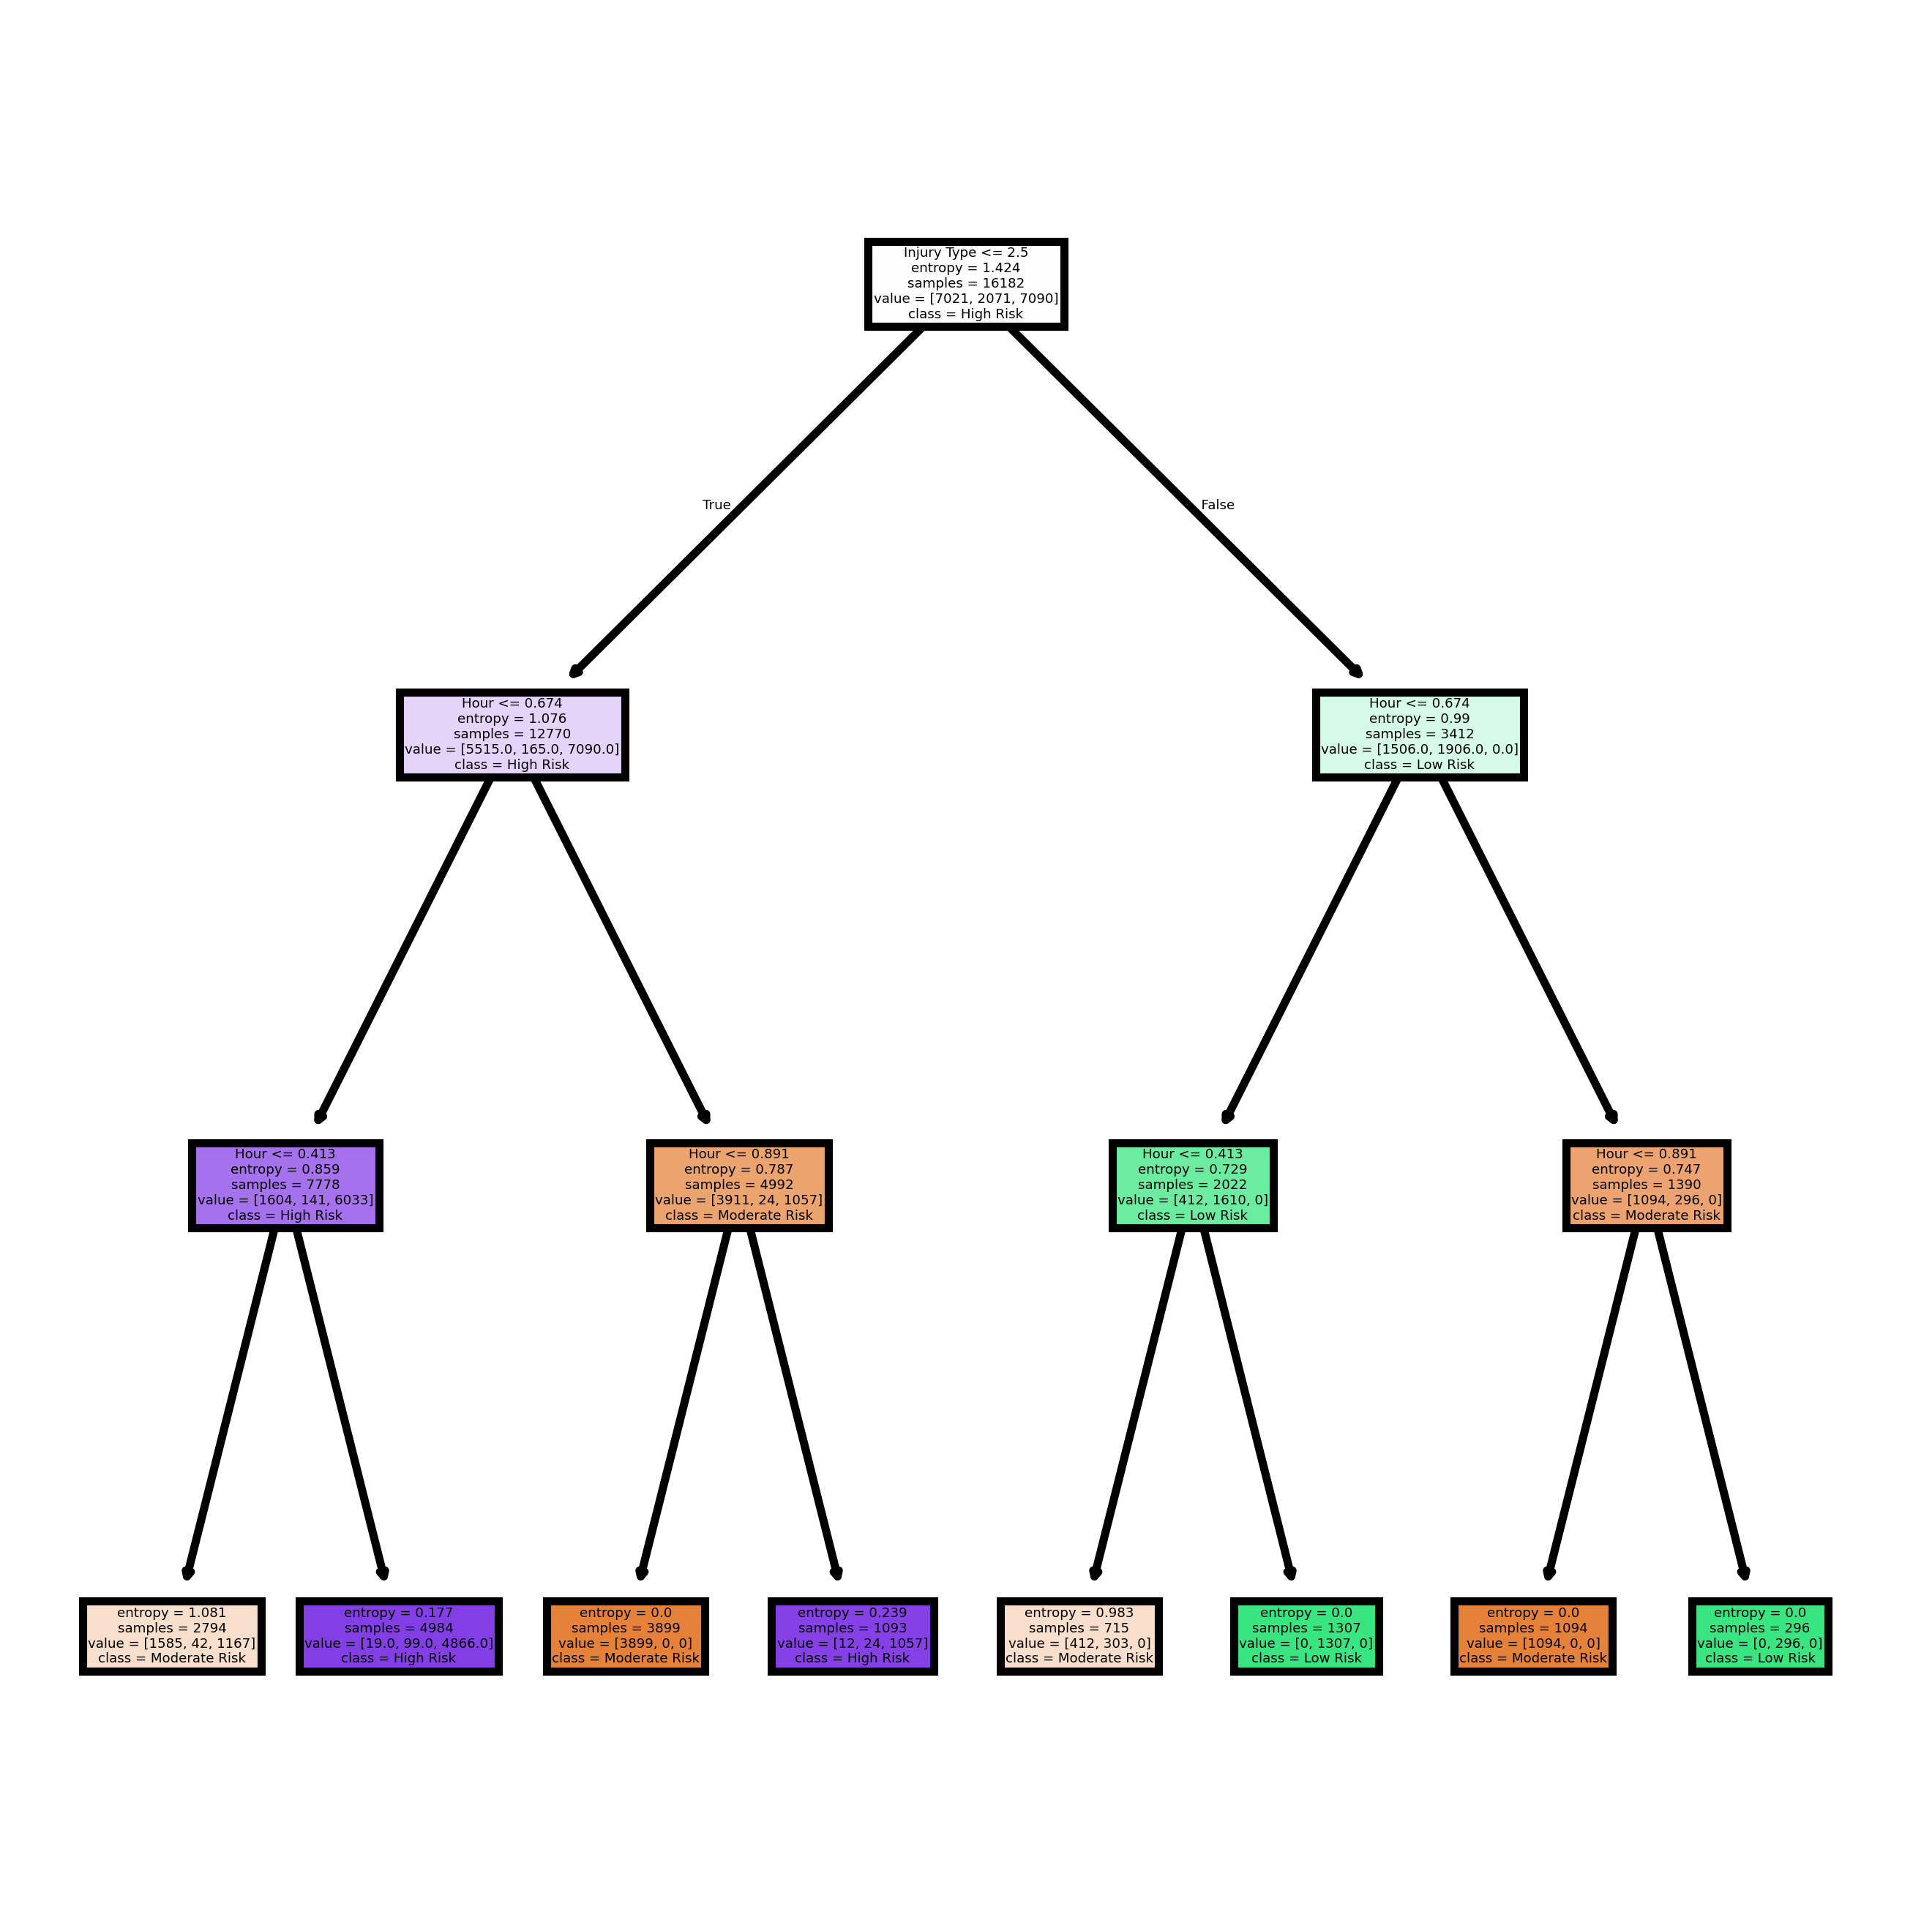

In [ ]:
#split dataset into training set and test set
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.7,random_state=1) # %70 test %30 training

#Create Decision Tree classifier Object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Train Decision Tree classifier
clf = clf.fit(X_train,y_train)

#predict the response for test Data
y_pred = clf.predict(X_test)

# Model Accuracy, How often is the classfier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

# Compute and print the confusion matirx 
cm = confusion_matrix(y_test,y_pred)
print(cm)

# classes_names
cn = df['Risk Level'].unique()

#create confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)

# setting dpi =800 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, figsize=(4,4), dpi=800)

tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True);

# save your model to a file
filename = 'decision_tree_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# load  model from a file
loaded_model = pickle.load(open(filename,'rb'))

# Make predictions with the model on test data
predictions = loaded_model.predict(X_test)
print("predictions for test data: \n",predictions)

### Part 2
#### Clustering:

//

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt 
data = pd.read_csv("Dataset/Processed_dataset.csv", encoding="windows-1252")  
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53943 non-null  int64  
 4   Hour               53943 non-null  float64
 5   Collision Type     53943 non-null  int64  
 6   Injury Type        53943 non-null  int64  
 7   Primary Factor     53943 non-null  int64  
 8   Reported_Location  53943 non-null  int64  
 9   Latitude           53943 non-null  float64
 10  Longitude          53943 non-null  float64
 11  Risk Level         53943 non-null  object 
 12  Hour_Bin           53943 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 5.4+ MB
None


### Step 1: Feature Scaling
To prepare for clustering, we removed the target variable, 'Risk Level,' and standardized the remaining features. Standard scaling was applied to ensure that each feature contributes equally to the clustering algorithm.

Below is the head of the scaled dataset:

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Remove class label for clustering
features = data.drop(columns=['Risk Level'])

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows to confirm scaling
print("\nScaled DataFrame:")
print(scaled_data.head())



Scaled DataFrame:
       Year     Month       Day  Weekend?      Hour  Collision Type  \
0  1.591657 -1.611041  0.420592 -0.571221 -2.539427       -0.058135   
1  1.591657 -1.611041  0.944311 -0.571221  0.287886       -0.058135   
2  1.591657 -1.611041  0.944311  1.750636  1.795786       -0.058135   
3  1.591657 -1.611041  1.468030  1.750636 -0.843039       -0.058135   
4  1.591657 -1.611041  1.468030  1.750636 -0.466064       -0.058135   

   Injury Type  Primary Factor  Reported_Location  Latitude  Longitude  \
0    -0.404883        0.330961          -1.339926  0.316932  -0.316895   
1    -0.404883       -0.698938          -1.287891  0.317130  -0.317254   
2     1.819890       -1.085150          -0.815059  0.316097  -0.318619   
3     1.819890       -0.763306           0.200040  0.317503  -0.318902   
4    -0.404883       -0.763306           1.585908  0.317432  -0.319049   

   Hour_Bin  
0  2.045609  
1 -0.933502  
2  0.059535  
3  1.052572  
4  1.052572  


In [ ]:
%pip install Kneed


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

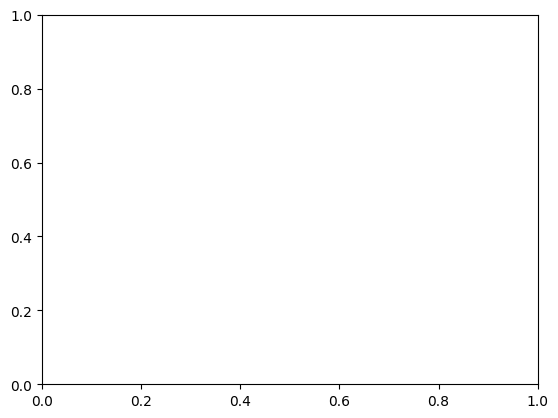

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from kneed import KneeLocator

wss_values=[]
k_values= range(1,11)

for k in k_values:
    KMeans=make_pipeline (StandardScaler(), KMeans(n_clusters=k))
    KMeans.fit(scaled_data)
    wss_values.append(KMeans.named_steps['kmeans'].inertia_)



    plt.plot(k_values, wss_values, marker='o')
    plt.xlabel('NUmber of clusters (k)')
    plt.ylabel('Within-cluster sum of square (WSS)')
    plt.title('Elbow Method')
    plt.legend()
    plt.show()